In [22]:
import matplotlib.pyplot as plt
import srt_util
import PhysicsTool as pt
pt.plotting.set_theme()
import numpy as np

In [23]:
def plot_elevation_scan(file_path):
    with srt_util.SRT_HDF_Reader(file_path) as srt_reader:
        pos = srt_reader.get_object_positions()
        spec = srt_reader.get_power_spectrum()
        print('Start of measurement: ', srt_reader.get_time()[0])
    azimut = int(pos['Azimuth'][0])
    plt.scatter(pos['Elevation'], spec.sum(axis=1), label = f'Azimut = {azimut}°', marker='o')

In [24]:
def plot_power_spectrum(file_path: str, idx: int):
    with srt_util.SRT_HDF_Reader(file_path) as srt_reader:
        spec = srt_reader.get_power_spectrum()[idx]
        elevation = srt_reader.get_object_positions()['Elevation'][idx]
        azimut = srt_reader.get_object_positions()['Azimuth'][idx]
        plt.plot(srt_util.SPECTROMETER_FREQUENCIES / 1e6, spec, label = f'Elevation = {elevation}°, Azimut = {azimut}°')
        plt.xticks(srt_util.SPECTROMETER_TICKS / 1e6)

Start of measurement:  2025-10-01T20:28:52
Start of measurement:  2025-10-01T20:23:33


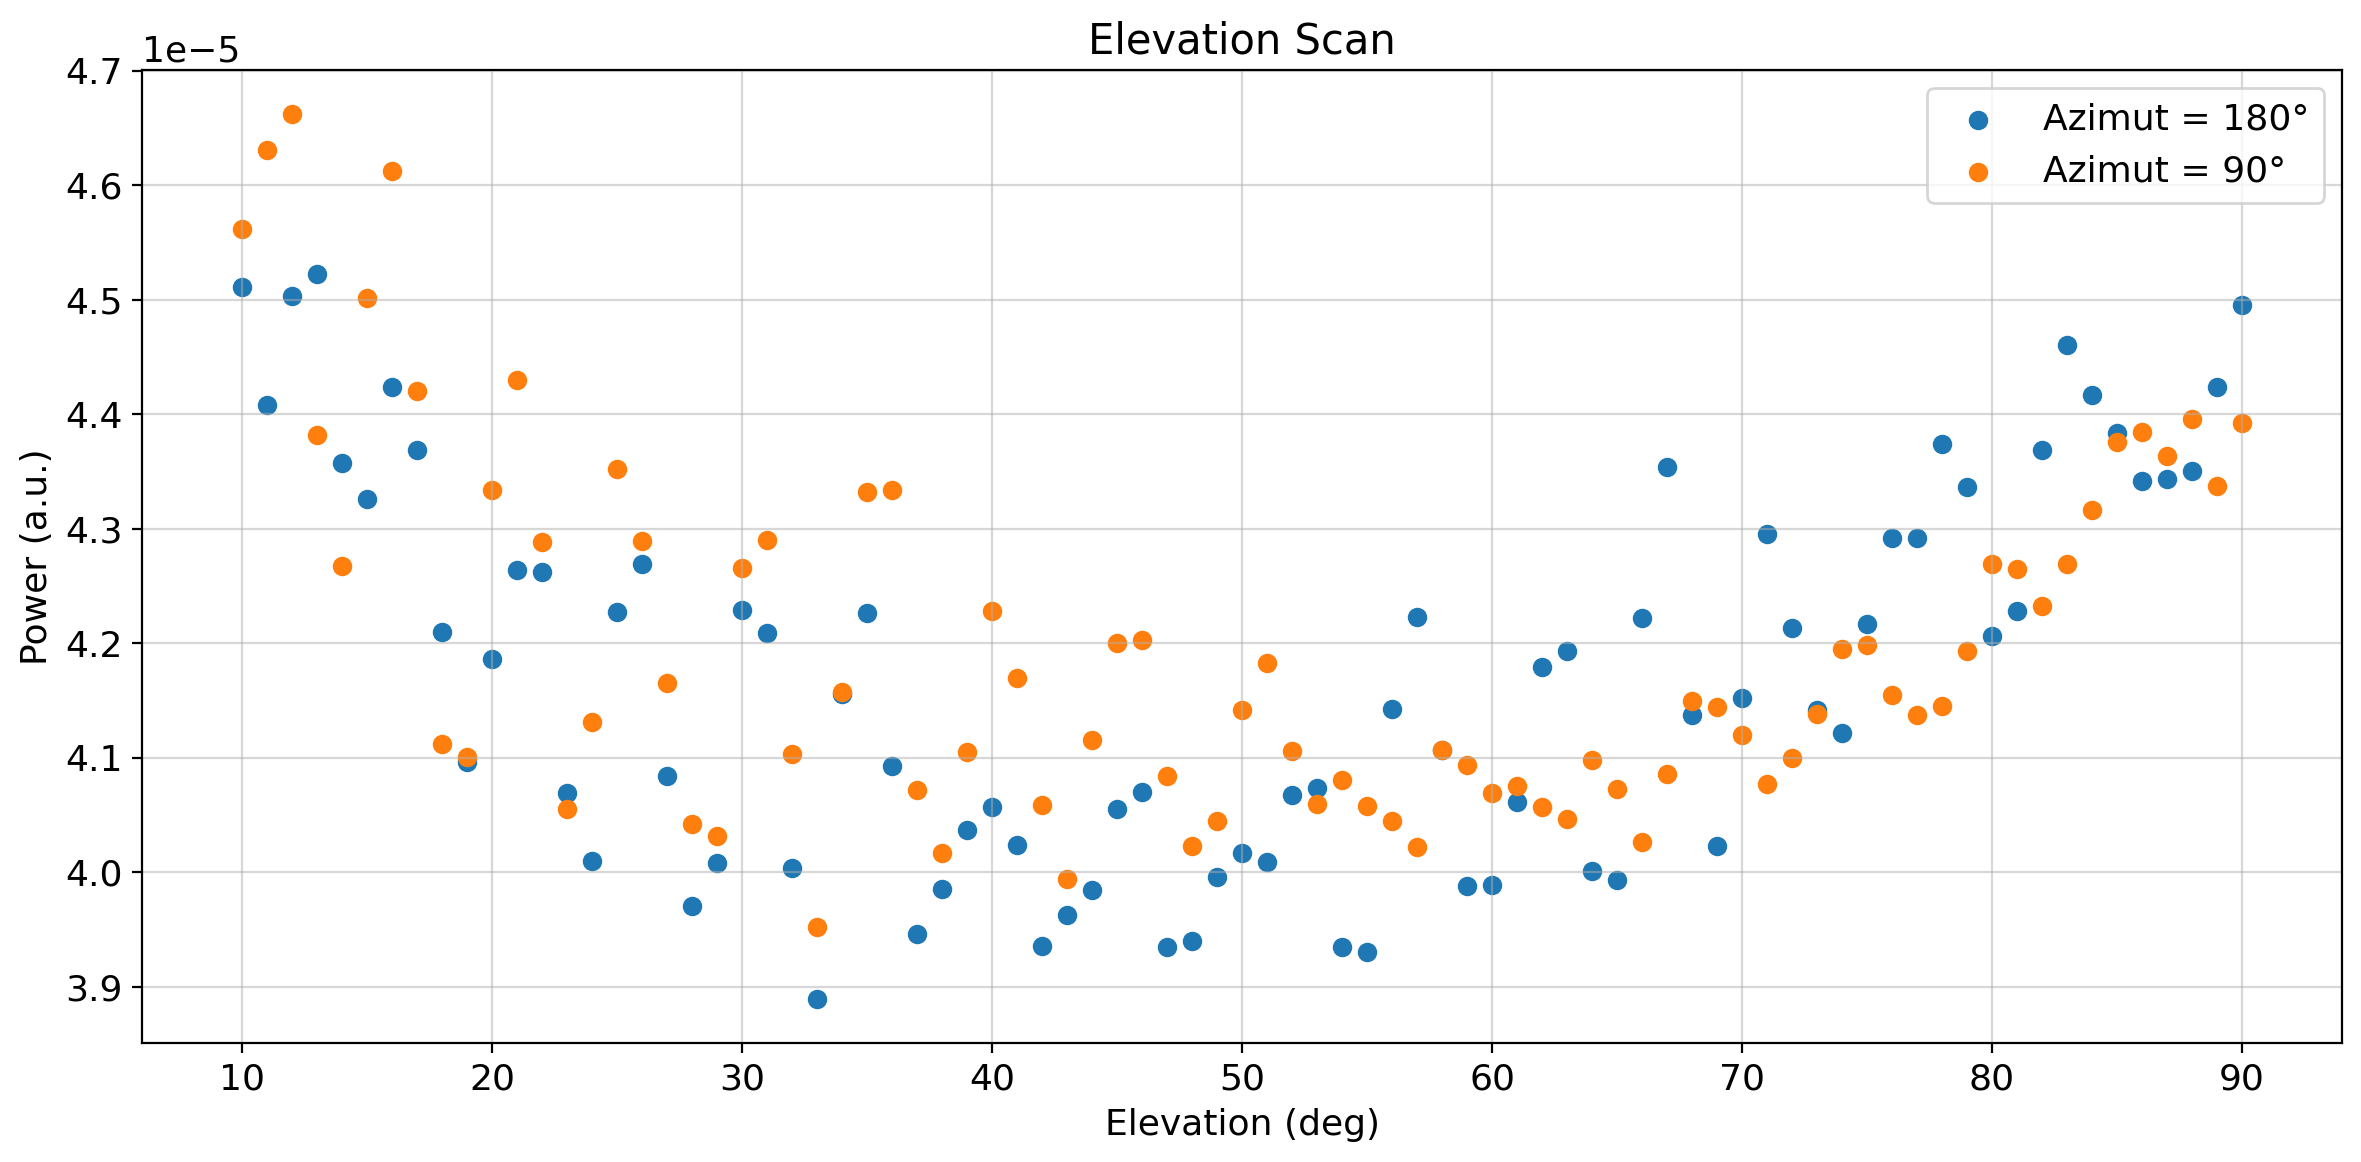

In [25]:
pt.plotting.set_up_plot(f'Elevation Scan', 'Elevation (deg)', 'Power (a.u.)')
plot_elevation_scan('Measurements/ElevationScan/ElevationScan_T2220_Az180_20251001.hdf')
plot_elevation_scan('Measurements/ElevationScan/ElevationScan_T2220_Az90_20251001.hdf')
plt.legend()
plt.show()

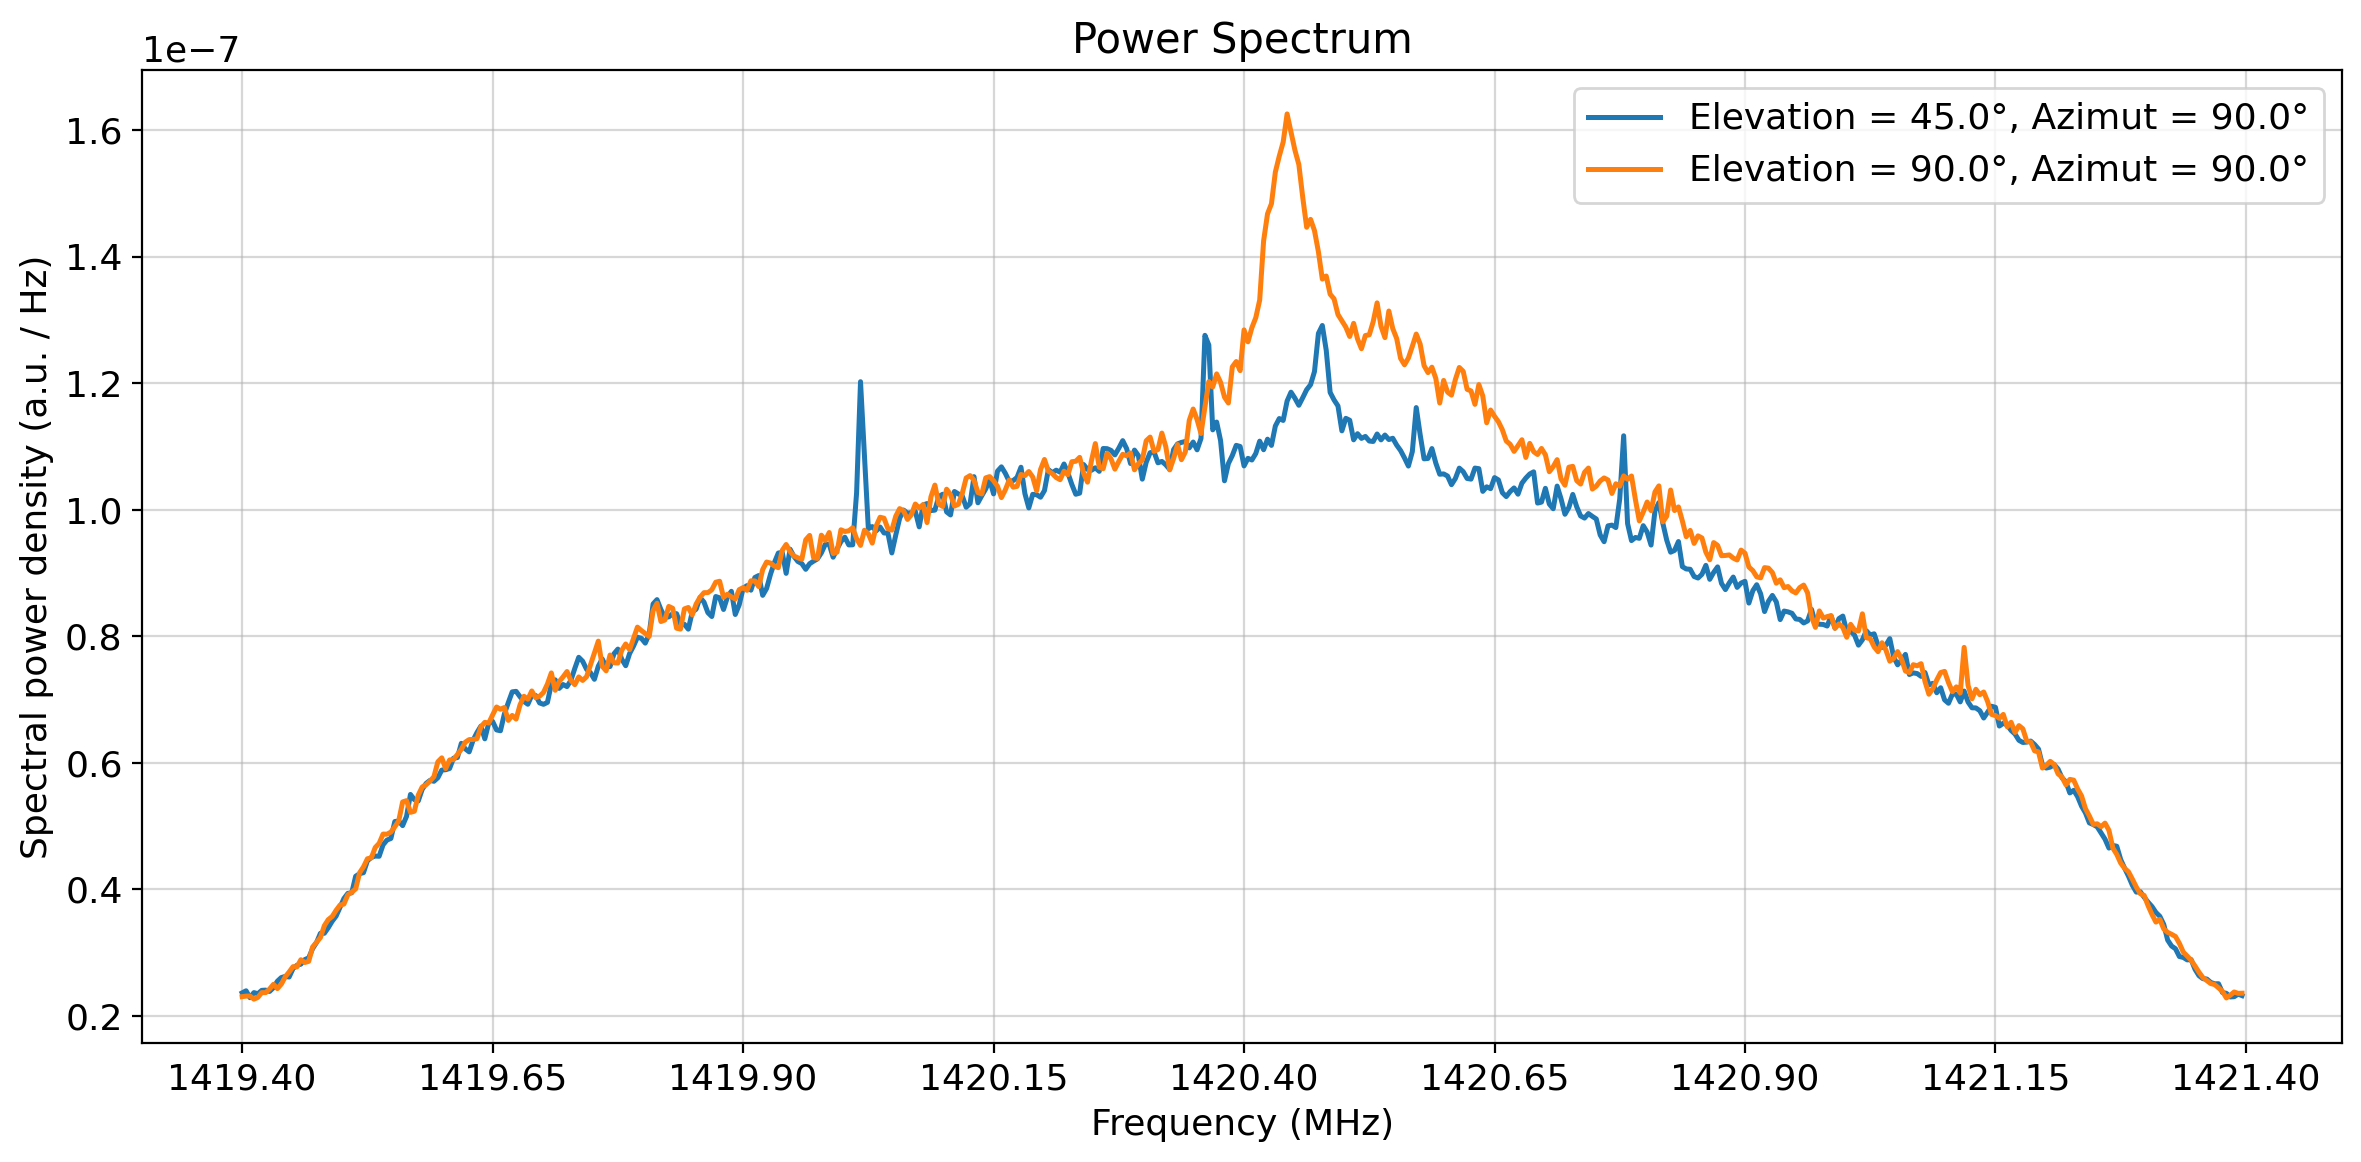

In [26]:
pt.plotting.set_up_plot(f'Power Spectrum', 'Frequency (MHz)', 'Spectral power density (a.u. / Hz)')
plot_power_spectrum('Measurements/ElevationScan/ElevationScan_T2220_Az90_20251001.hdf', 35)
plot_power_spectrum('Measurements/ElevationScan/ElevationScan_T2220_Az90_20251001.hdf', -1)
plt.legend()
plt.show()

the spike is likely the milkiway, therefore perform another scan at a diffrent time, to compare

Start of measurement:  2025-10-02T10:51:30
Start of measurement:  2025-10-02T10:59:54


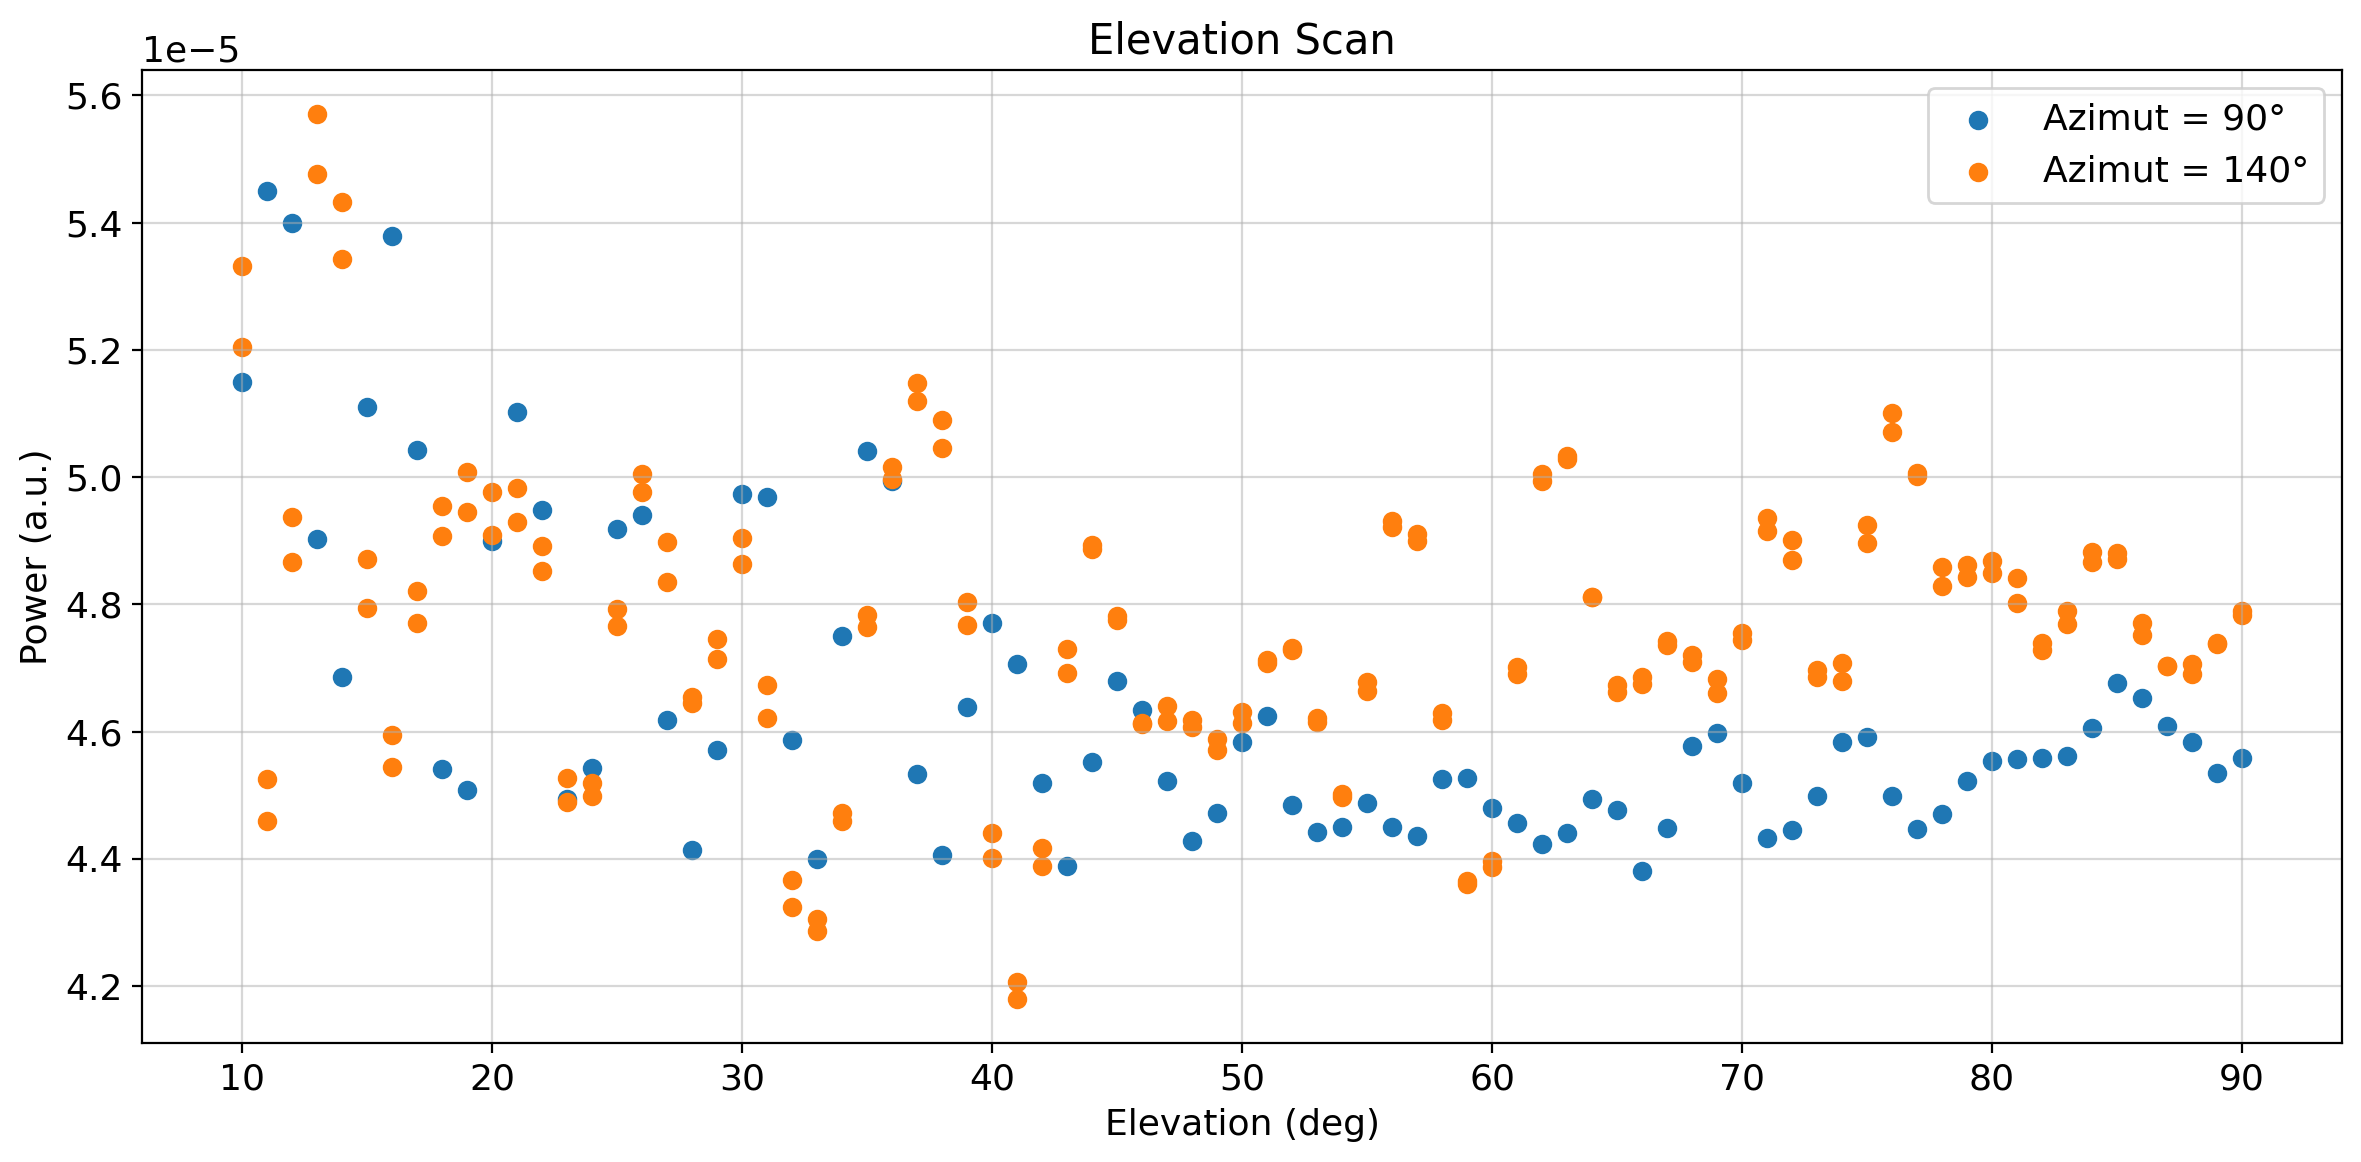

In [27]:
pt.plotting.set_up_plot(f'Elevation Scan', 'Elevation (deg)', 'Power (a.u.)')
plot_elevation_scan('Measurements/ElevationScan/2ndScanAtDay_noMilkyWay/ElevationScan_T1250_Az90_20251002.hdf')
plot_elevation_scan('Measurements/ElevationScan/2ndScanAtDay_noMilkyWay/ElevationScan_T1300_Az140_20251002.hdf')
plt.legend()
plt.show()

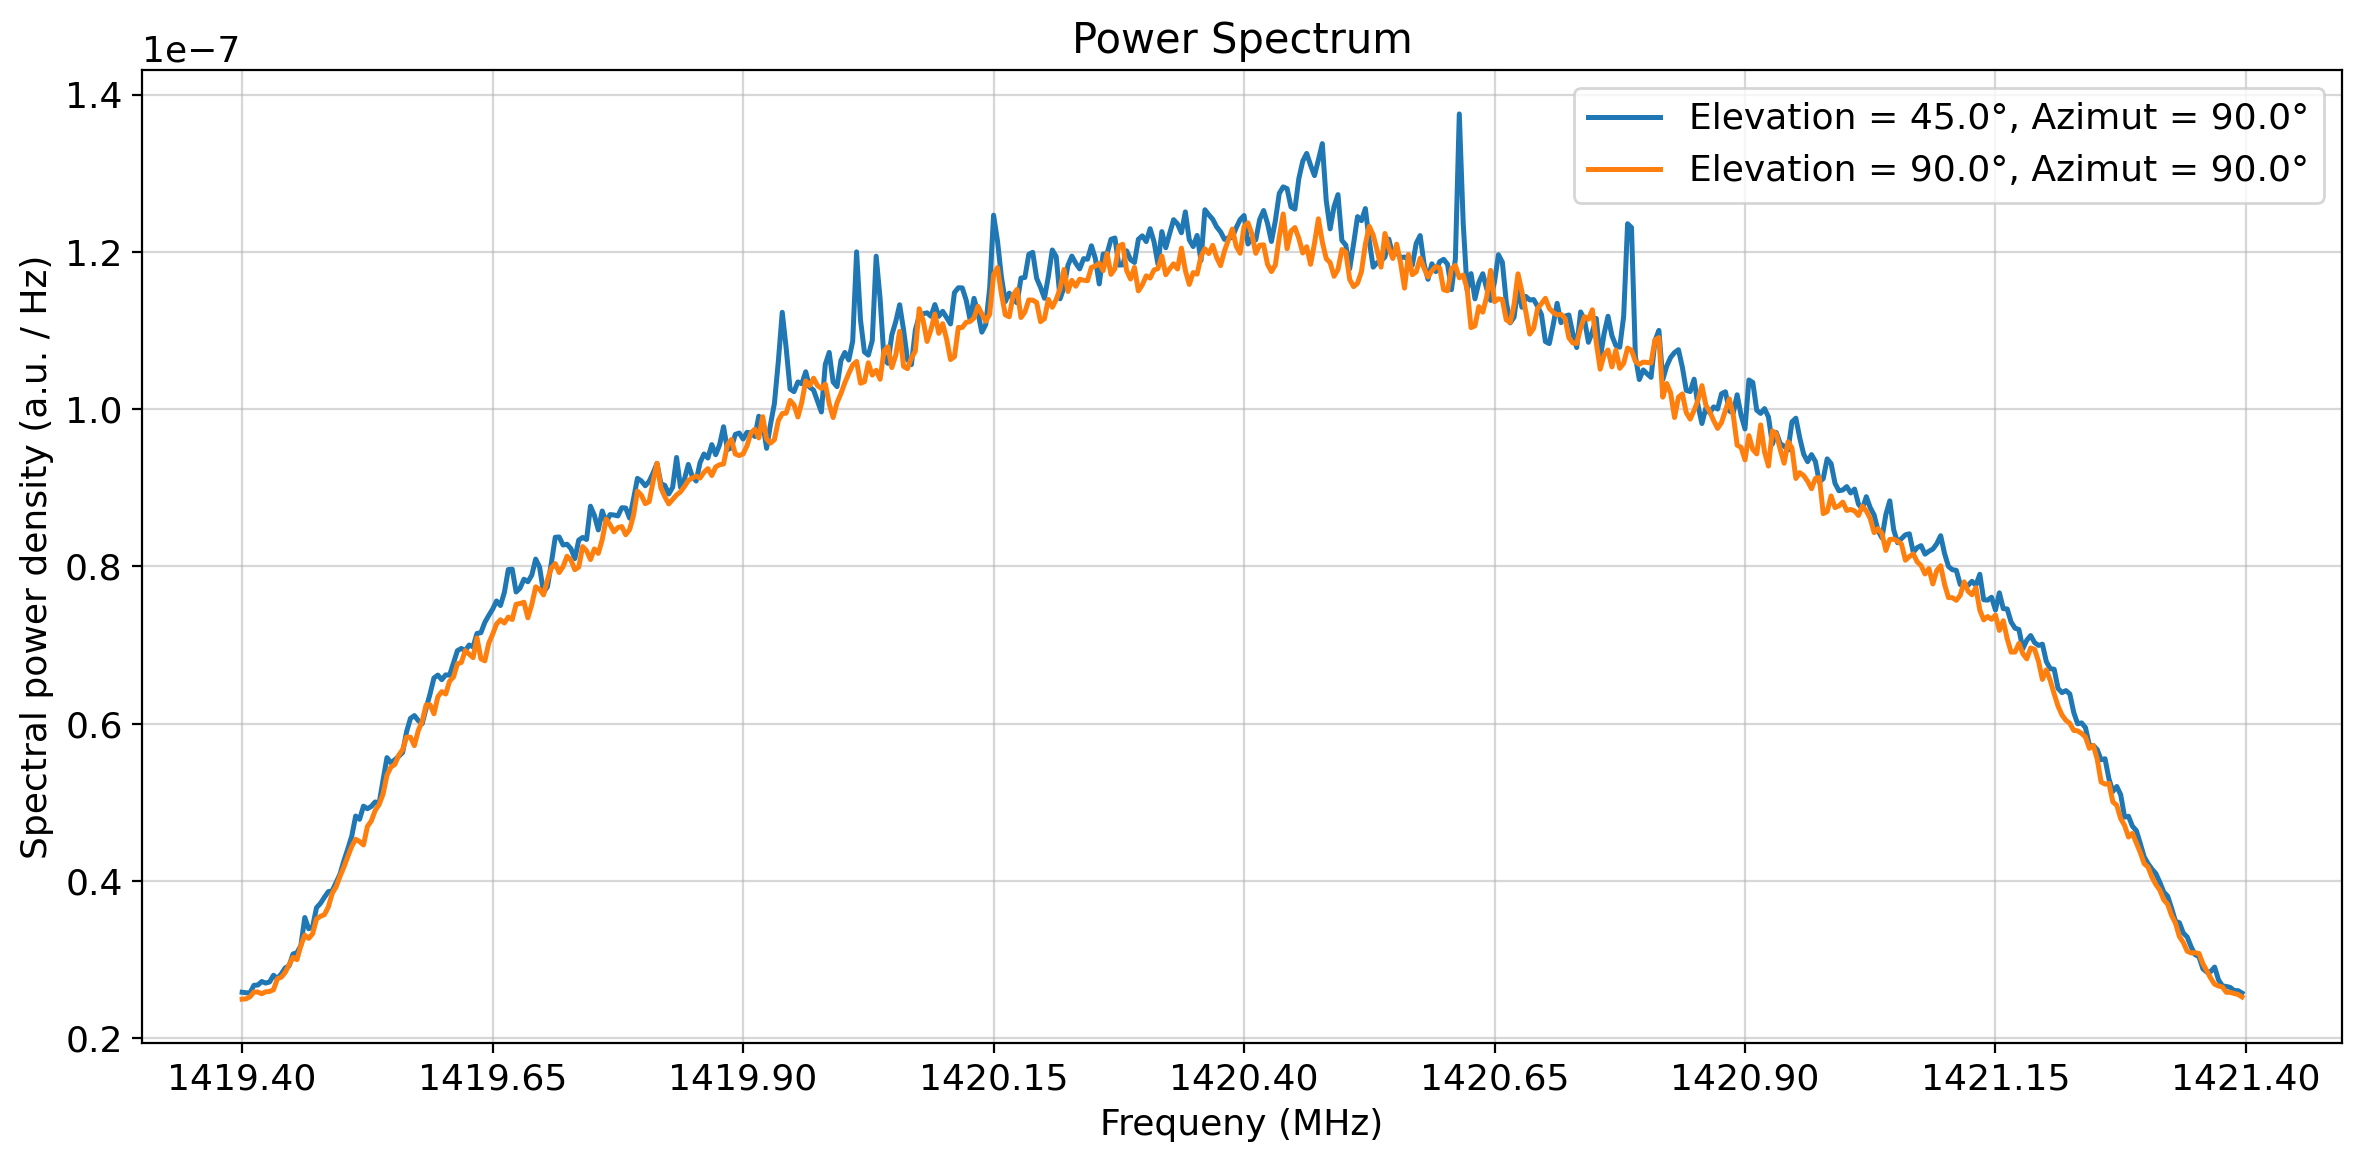

In [28]:
pt.plotting.set_up_plot(f'Power Spectrum', 'Frequeny (MHz)', 'Spectral power density (a.u. / Hz)')
plot_power_spectrum('Measurements/ElevationScan/2ndScanAtDay_noMilkyWay/ElevationScan_T1250_Az90_20251002.hdf', 35)

plot_power_spectrum('Measurements/ElevationScan/2ndScanAtDay_noMilkyWay/ElevationScan_T1250_Az90_20251002.hdf', -1)
plt.legend()
plt.show()